## **Excercise3**
### **Hanwriting Recognition -CNN**

## Simple CNN

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
#Download data
mnist=tf.keras.datasets.mnist
(train_img,train_label),(test_img,test_label)=mnist.load_data()

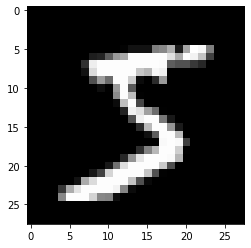

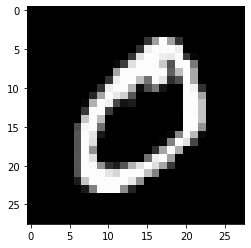

In [32]:
#display the sample images
import matplotlib.pyplot as plt
for i in range(2):
  plt.imshow(train_img[i],cmap='gray')
  plt.show()

In [33]:
#normalize data
train_img=train_img/255.0
test_img=test_img/255.0

In [41]:
#Construct the sequetial model
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                  
])


In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_img, train_label, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2003 - accuracy: 0.9409
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0794 - accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0529 - accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9781


In [45]:
test_loss = model.evaluate(test_img, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9781


**##Convolutional Neural Networks**


In [58]:
#Construct the CNN model
model=tf.keras.models.Sequential([
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPool2D((2,2)),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')
])

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [60]:
model.fit(train_img,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1221 - accuracy: 0.9620
Epoch 2/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0418 - accuracy: 0.9873
Epoch 3/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0202 - accuracy: 0.9935
Epoch 5/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0155 - accuracy: 0.9949


In [61]:
test_loss=model.evaluate(test_img,test_label)

313/313 [==============================] - 4s 13ms/step - loss: 0.0307 - accuracy: 0.9906


#Visualizing the Convolutions and Pooling


In [63]:
print(test_label[:100])


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


IndexError: ignored

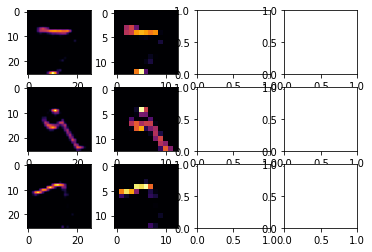

In [83]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_img[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_img[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_img[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# **EXERCISES**
1. Try editing the convolutions. Change the 32s to either 16 or 64. What 
impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
#Q1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [74]:
mnist=tf.keras.datasets.mnist
(train_img,train_label),(test_img,test_label)=mnist.load_data()
train_img=train_img/255.0
test_img=test_img/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_img, train_label, epochs=10)
test_loss, test_acc = model.evaluate(test_img, test_label)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1453 - accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0510 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0324 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0204 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0136 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0048 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 37s 20m

NameError: ignored

In [75]:
test_loss, test_acc = model.evaluate(test_img, test_label)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0632 - accuracy: 0.9857
0.9857000112533569


In [80]:
#Q5
#Define Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>99.0):
       print("Reached 99% accuracy so cancelling training!")
       self.model.stop_training=True


In [81]:
callback=myCallback()

In [82]:
history=model.fit(train_img,train_label,epochs=10,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0044 - accuracy: 0.9987
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0028 - accuracy: 0.9990
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0029 - accuracy: 0.9990
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0024 - accuracy: 0.9991
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 10/10
1875/1875 [==============================] - 37s 20m